In [6]:
import os
import zipfile
# import random
# import shutil
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from shutil import copyfile
# import matplotlib.pyplot as plt
# import psutil
# import time

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [7]:
train_data_path = "train"
validation_data_path = "valid"
test_data_path = "test"

In [8]:
img_width, img_height = 150, 150
# channel = (3, )
input_shape = (img_width, img_height)
# input_shape = tf.expand_dims(input_shape , -1)
batch_size = 64

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'

)

validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'

)

test_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                    fill_mode='nearest'

                                  )

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode="categorical",
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_path,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_data_path,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 260915 images belonging to 14 classes.
Found 47531 images belonging to 14 classes.
Found 137375 images belonging to 14 classes.


In [11]:
# def tf_data_generator(generator, input_shape):
#     num_class = generator.num_classes
#     print(num_class)
#     tf_generator = tf.data.Dataset.from_generator(
#         lambda: generator,
#         output_types=(tf.float32, tf.float32),
#         output_shapes=([None, input_shape[0], input_shape[1]],
#                        [None, num_class])
#     )
#     return tf_generator


# train_data = tf_data_generator(train_generator, input_shape)
# test_data = tf_data_generator(test_generator, input_shape)
# val_data = tf_data_generator(validation_generator, input_shape)

In [12]:
# def tf_data_generator(generator, input_shape):
#   num_class = generator.num_classes
#   print(num_class)
#   tf_generator = tf.data.Dataset.from_generator(
#       lambda: generator,
#       output_types=(tf.float32, tf.float32),
#       output_shapes=([None, *input_shape], [None, num_class])
#   )
#   return tf_generator


# train_data = tf_data_generator(train_generator, input_shape)
# test_data = tf_data_generator(test_generator, input_shape)
# val_data = tf_data_generator(validation_generator, input_shape)

In [13]:
def tf_data_generator(generator, input_shape):
  num_class = generator.num_classes
  print(num_class)

  # Define a separate function for generating data
  def _generator():
    for images, labels in generator:
      yield images, labels

  # Create the tf.data.Dataset from the non-decorated function
  tf_generator = tf.data.Dataset.from_generator(
      _generator,
      output_types=(tf.float32, tf.float32),
      output_shapes=([None, input_shape[0], input_shape[1], None],
                     [None, num_class])
  )

  return tf_generator


train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(validation_generator, input_shape)

14
14
14


In [14]:
def create_model(img_width, img_height, num_classes):

    model = Sequential([
        # tf.keras.layers.Conv2D(
        #     8, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
        # tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
        # tf.keras.layers.MaxPooling2D(2, 2),

        # tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        # tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        # tf.keras.layers.MaxPooling2D(2, 2),

        # tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        # tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        # tf.keras.layers.MaxPooling2D(2, 2),

        # tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        # tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        # tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(
            32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3), kernel_initializer='he_uniform'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(
            64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(
            128, (3, 3), activation='relu', kernel_initializer='he_uniform'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(
            256, (3, 3), activation='relu', kernel_initializer='he_uniform'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Flatten(),
        # tf.keras.layers.Dense(140, activation='relu',
        #                       kernel_initializer='he_uniform'),
        tf.keras.layers.Dense(512, activation='relu',
                              kernel_initializer='he_uniform'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(14, activation='softmax'),
    ])

    return model


model = create_model(img_width, img_height, 14)

In [15]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy", "categorical_crossentropy"],
)

In [16]:
import graphviz

In [17]:
model_viz = tf.keras.utils.plot_model(model,
                                      to_file='model.png',
                                      show_shapes=True,
                                      show_layer_names=True,
                                      rankdir='TB',
                                      expand_nested=True,
                                      dpi=55)
model_viz

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss", patience=3)

history1 = model.fit(
    train_data,
    steps_per_epoch=len(train_generator) // train_generator.batch_size,
    epochs=30,
    validation_data=val_data,
    validation_steps=len(
        validation_generator) // validation_generator.batch_size,
    callbacks=[early_stopping],
)
# history1 = model.fit(
#     train_generator,
#     steps_per_epoch=len(train_generator) // train_generator.batch_size,
#     epochs=30,
#     validation_data=validation_generator,
#     validation_steps=len(
#         validation_generator) // validation_generator.batch_size,
#     callbacks=[early_stopping],
# )

Epoch 1/30
63/63 [==============================] - 79s 1s/step - loss: 2.9536 - accuracy: 0.1310 - categorical_crossentropy: 2.9536 - val_loss: 2.5089 - val_accuracy: 0.1733 - val_categorical_crossentropy: 2.5089
Epoch 2/30
63/63 [==============================] - 77s 1s/step - loss: 2.4498 - accuracy: 0.1746 - categorical_crossentropy: 2.4498 - val_loss: 2.4623 - val_accuracy: 0.1463 - val_categorical_crossentropy: 2.4623
Epoch 3/30
63/63 [==============================] - 75s 1s/step - loss: 2.4344 - accuracy: 0.1877 - categorical_crossentropy: 2.4344 - val_loss: 2.4263 - val_accuracy: 0.1619 - val_categorical_crossentropy: 2.4263
Epoch 4/30
63/63 [==============================] - 72s 1s/step - loss: 2.4012 - accuracy: 0.1880 - categorical_crossentropy: 2.4012 - val_loss: 2.4504 - val_accuracy: 0.2259 - val_categorical_crossentropy: 2.4504
Epoch 5/30
63/63 [==============================] - 71s 1s/step - loss: 2.3851 - accuracy: 0.2098 - categorical_crossentropy: 2.3851 - val_loss:

In [19]:
#  0.2639 

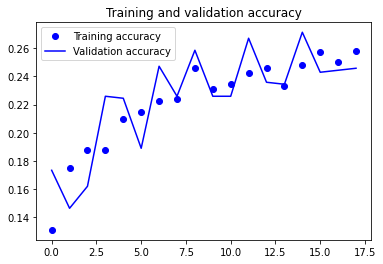

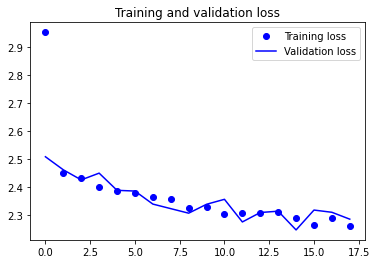

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
model.save('model.h5', include_optimizer=True)

c:\Users\aditr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
# model.evaluate(
#     train_generator,
#     steps=len(train_generator) // train_generator.batch_size,
#     verbose=0
# )

# print(f"Test accuracy: {acc:.4f}, Test loss: {loss:.4f}")

In [23]:
# model.evaluate(
#     test_generator,
#     steps=len(test_generator) // test_generator.batch_size,
#     verbose=0
# )

In [24]:
import requests
from io import BytesIO

from PIL import Image
import numpy as np

In [25]:
# Parameters
input_size = (150, 150)

# define input shape
channel = (3,)
input_shape = input_size + channel

# define labels
labels = ["concert", "graduation", "meeting", "mountain-trip", "picnic",
                    "sea-holiday", "ski-holiday", "wedding", "conference", "exhibition", "fashion",
                    "protest", "sport", "theater-dance"]

In [26]:
def preprocess(img, input_size):
    nimg = img.convert('RGB').resize(input_size, resample=0)
    img_arr = (np.array(nimg))/255
    return img_arr


def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [27]:
from tensorflow.keras.models import load_model

In [55]:
# ada 2 cara load model, jika cara pertama berhasil maka bisa lasngusng di lanjutkan ke fungsi prediksi

MODEL_PATH = 'model.h5'
model = load_model(MODEL_PATH, compile=False)

In [56]:
im = Image.open('3.jpg')
X = preprocess(im, input_size)
X = reshape([X])
y = model.predict(X)

print(labels[np.argmax(y)], np.max(y) )

1/1 [==============================] - 0s 73ms/step
meeting 0.16331142
